In [2]:
import pandas as pd
df=pd.read_csv("outputd0315.csv")
print(df)

           Date      Time  average insect count   Class  \
0    2023-04-27  18:30:00              4.571429  OSMACO   
1    2023-04-27  18:40:00              4.009615  OSMACO   
2    2023-04-27  18:50:00              2.469526  OSMACO   
3    2023-04-27  19:00:00              2.574742  OSMACO   
4    2023-04-27  19:10:00              3.038168  OSMACO   
..          ...       ...                   ...     ...   
608  2023-06-01  15:00:00              0.901961  OSMACO   
609  2023-06-01  15:10:00              0.759259  OSMACO   
610  2023-06-01  15:20:00              0.125000  OSMACO   
611  2023-06-01  12:50:00              0.960265  OSMACO   
612  2023-06-01  10:20:00              0.732673  OSMACO   

     Dew Point, *C, WEASN17 Osmia 2023  Gust Speed, m/s, WEASN17 Osmia 2023  \
0                                8.667                                 0.00   
1                                8.208                                 0.00   
2                                7.781                

In [3]:
df.describe()


,average insect count,"Dew Point, *C, WEASN17 Osmia 2023","Gust Speed, m/s, WEASN17 Osmia 2023","RH, %, WEASN17 Osmia 2023 Air humidity","Temperature, *C, WEASN17 Osmia 2023 AIr temperature","Rain, mm, WEASN17 Osmia 2023 Precipitation","Solar Radiation, W/m^2, WEASN17 Osmia 2023 Radiation","Wind Speed, m/s, WEASN17 Osmia 2023 Wind speed"
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,2.597738,12.042825,0.664356,71.757961,17.670140,0.008157,310.476183,0.093638
std,1.496624,2.957216,0.644095,16.750641,4.590821,0.063524,275.656504,0.169824
min,0.125000,5.412000,0.000000,35.370000,8.276000,0.000000,1.000000,0.000000
25%,1.504587,9.936000,0.000000,60.340000,13.804000,0.000000,66.700000,0.000000
50%,2.089888,12.586000,0.500000,68.690000,17.374000,0.000000,243.200000,0.000000
75%,3.469388,13.887000,1.150000,87.660000,21.377000,0.000000,495.300000,0.100000
max,9.186047,20.500000,3.350000,99.100000,27.273000,0.860000,927.200000,1.250000


In [4]:

X=df.iloc[:,4:11] #environmental features attributes
X.drop(columns=['Rain, mm, WEASN17 Osmia 2023 Precipitation'], inplace=True) 

y=df.iloc[:, 2].values   #average insect count

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [6]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

In [7]:
#y_pred = regressor.predict(X_test)
y_pred = regressor.predict(X_test)


In [8]:
print('The Training r_sq is : %.2f'% regressor.score(X_train, y_train))

The Training r_sq is : 1.00


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,explained_variance_score,r2_score


In [10]:
y_pred=regressor.predict(X_train)
print('the r_square value is', r2_score(y_train,y_pred))

the r_square value is 1.0


In [11]:
print("The MAE is ", mean_absolute_error(y_train,y_pred))

The MAE is  0.0


In [25]:
#print("The MSE is", mean_squared_error(y_train,y_pred))
from sklearn.metrics import r2_score

# Assuming you have already trained the Random Forest Regressor model
y_train_pred = regressor.predict(X_train)  # Replace rf_regressor with your trained model variable

# Calculate the R2 score for the training dataset
r2_train = r2_score(y_train, y_train_pred)  # Replace y_train with your actual target values for the training dataset

print("R2 Score (Training):", r2_train*100 ,"%")


R2 Score (Training): 100.0 %


In [ ]:
import numpy as np
print("The RMSE is",np.sqrt(mean_squared_error(y_train,y_pred)))

The RMSE is 0.0


In [ ]:
print("The EVS is",explained_variance_score(y_train,y_pred))

The EVS is 1.0


In [26]:
#Prediction on testing data
y_pred=regressor.predict(X_test)
print("The testing r square is: ", r2_score(y_test,y_pred))

The testing r square is:  0.5882589944553185


In [27]:
print("the testing r square is: ",regressor.score(X_test,y_test))

the testing r square is:  0.5882589944553185


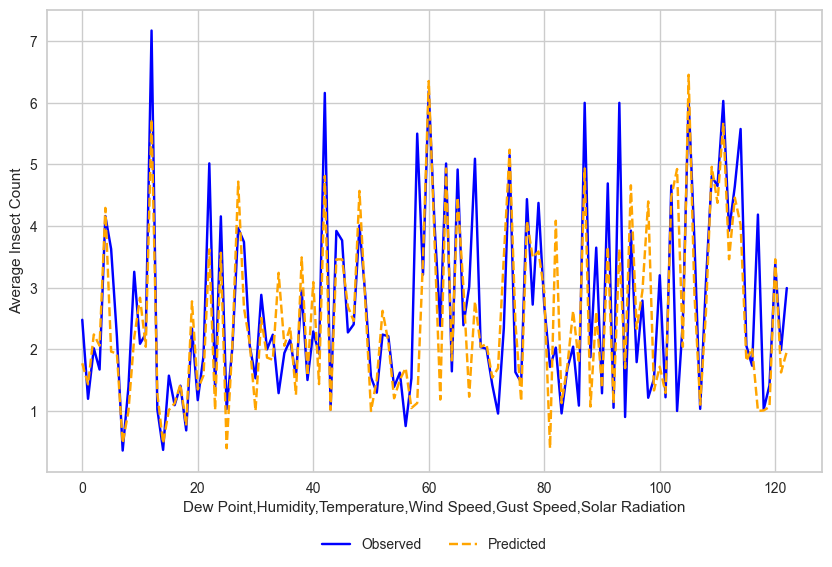

In [28]:
#Plotting the observed and predicted average insect count
import matplotlib.pyplot as plt
#Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (10,6)
x_ax=range(len(X_test))
plt.plot(x_ax,y_test, label = 'Observed', color='blue',linestyle='-')
plt.plot(x_ax,y_pred,label ="Predicted", color='orange',linestyle='--')
plt.ylabel('Average Insect Count')
plt.xlabel('Dew Point,Humidity,Temperature,Wind Speed,Gust Speed,Solar Radiation')
plt.legend(bbox_to_anchor=(0.5,-0.2),loc='lower center',ncol=2,frameon=False)
plt.show()

c:\Users\JRF_Awadh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


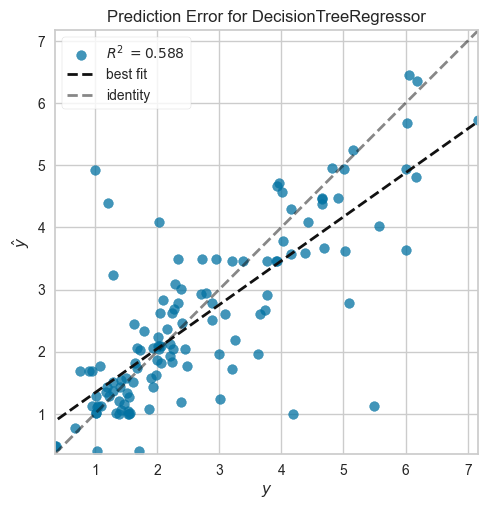

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError
visualiser = PredictionError(regressor)
visualiser.fit(X_train, y_train)
visualiser.score(X_test,y_test)
visualiser.poof()

c:\Users\JRF_Awadh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


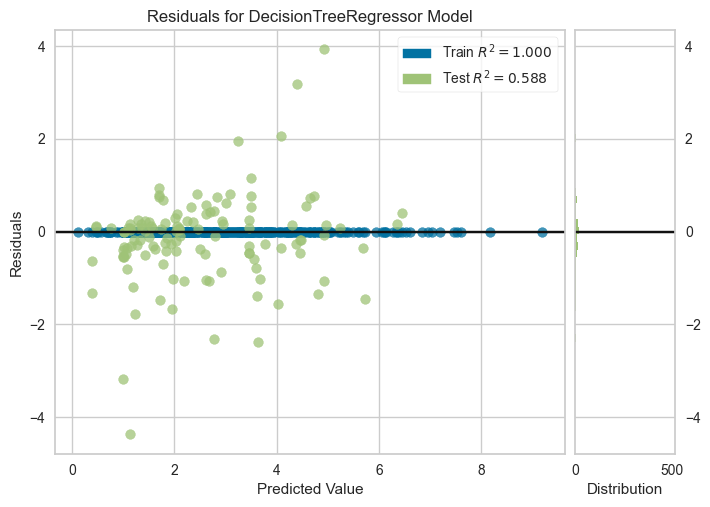

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
#Residual Plot
from yellowbrick.regressor import ResidualsPlot
visualiser = ResidualsPlot(regressor)
visualiser.fit(X_train,y_train)
visualiser.score(X_test,y_test)
visualiser.poof()

In [ ]:
import numpy as np
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test,y_pred)
#RMSE & R2
mse =metrics.mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("RMSE =",rmse)
r2=metrics.r2_score(y_test,y_pred)
print("R square: ",r2)

RMSE = 0.9806347088765038
R square:  0.5882589944553185


In [ ]:
print("Accuracy of the model: ",rmse*100,"%")

Accuracy of the model:  98.06347088765038 %
